# Lab 2: Automatic Differentiation (Autograd) - Demo

This notebook demonstrates the automatic differentiation capabilities implemented in Lab 2.

## Table of Contents
1. [Introduction to Automatic Differentiation](#intro)
2. [Basic Gradient Computation](#basic)
3. [Chain Rule in Action](#chain)
4. [Computational Graphs](#graphs)
5. [Real-World Examples](#examples)
6. [Gradient Checking](#checking)
7. [Common Pitfalls](#pitfalls)

## 1. Introduction to Automatic Differentiation {#intro}

Automatic differentiation (autograd) is the foundation of modern deep learning. It allows us to automatically compute gradients of complex functions, which is essential for training neural networks using gradient descent.

**Key Concepts:**
- **Computational Graph**: A directed acyclic graph (DAG) representing the computation
- **Forward Pass**: Computing the function output
- **Backward Pass**: Computing gradients using the chain rule
- **Gradient Accumulation**: Summing gradients from multiple paths

In [1]:
import numpy as np
import sys
sys.path.append('../../../')

from semester1.lab2_autograd.autograd import Tensor, no_grad, check_gradients
import matplotlib.pyplot as plt

print("Autograd module loaded successfully!")

Autograd module loaded successfully!


## 2. Basic Gradient Computation {#basic}

### Example 1: Simple Function f(x) = x²

Let's compute the gradient of f(x) = x² at x = 3.

Mathematically: df/dx = 2x, so at x=3, df/dx = 6

In [2]:
# Create tensor with gradient tracking
x = Tensor([3.0], requires_grad=True)

# Forward pass
y = x ** 2
print(f"x = {x.data}")
print(f"y = f(x) = x² = {y.data}")

# Backward pass
y.backward()

# Check gradient
print(f"dy/dx = {x.grad.data}")
print(f"Expected: {2 * 3.0}")

x = [3.]
y = f(x) = x² = [9.]
dy/dx = [6.]
Expected: 6.0


### Example 2: Multivariable Function

Let's compute gradients for f(x, y) = x*y + x²

- ∂f/∂x = y + 2x
- ∂f/∂y = x

In [3]:
# Create variables
x = Tensor([2.0], requires_grad=True)
y = Tensor([3.0], requires_grad=True)

# Compute function
z = x * y + x ** 2

# Backward pass
z.backward()

print(f"z = x*y + x² = {z.data}")
print(f"∂z/∂x = {x.grad.data} (expected: y + 2x = 3 + 4 = 7)")
print(f"∂z/∂y = {y.grad.data} (expected: x = 2)")

z = x*y + x² = [10.]
∂z/∂x = [7.] (expected: y + 2x = 3 + 4 = 7)
∂z/∂y = [2.] (expected: x = 2)


### Example 3: Vector Operations

Autograd works seamlessly with vectors and matrices!

In [4]:
# Vector input
x = Tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)

# Compute sum of squares
y = (x ** 2).sum()

# Backward pass
y.backward()

print(f"x = {x.data}")
print(f"y = Σx² = {y.data}")
print(f"∂y/∂x = {x.grad.data}")
print(f"Expected: 2x = {2 * x.data}")

x = [1. 2. 3. 4.]
y = Σx² = 30.0
∂y/∂x = [2. 4. 6. 8.]
Expected: 2x = [2. 4. 6. 8.]


## 3. Chain Rule in Action {#chain}

The chain rule is fundamental to backpropagation: **df/dx = (df/dy) × (dy/dx)**

### Example 1: Simple Chain f(x) = (x²)²

In [5]:
x = Tensor([2.0], requires_grad=True)

# Build chain
y = x ** 2      # y = x² = 4
z = y ** 2      # z = y² = 16

print(f"y = x² = {y.data}")
print(f"z = y² = {z.data}")

# Backward pass
z.backward()

print(f"\nGradient computation:")
print(f"dz/dy = 2y = {2 * y.data}")
print(f"dy/dx = 2x = {2 * x.data}")
print(f"dz/dx = (dz/dy)(dy/dx) = {x.grad.data}")
print(f"Expected: 2*4 * 2*2 = {2 * 4.0 * 2 * 2.0}")

y = x² = [4.]
z = y² = [16.]

Gradient computation:
dz/dy = 2y = [8.]
dy/dx = 2x = [4.]
dz/dx = (dz/dy)(dy/dx) = [32.]
Expected: 2*4 * 2*2 = 32.0


### Example 2: Complex Chain f(x) = (x² + 1)³

In [6]:
x = Tensor([2.0], requires_grad=True)

y = x ** 2 + 1  # y = 5
z = y ** 3      # z = 125

z.backward()

print(f"f(x) = (x² + 1)³")
print(f"f({x.data[0]}) = {z.data}")
print(f"\ndf/dx = 3(x²+1)² × 2x")
print(f"      = 3(5)² × 4")
print(f"      = {x.grad.data[0]}")
print(f"Expected: {3 * 25 * 4}")

f(x) = (x² + 1)³
f(2.0) = [125.]

df/dx = 3(x²+1)² × 2x
      = 3(5)² × 4
      = 300.0
Expected: 300


### Example 3: Multiple Paths (Gradient Accumulation)

When a variable appears multiple times, gradients accumulate!

In [7]:
x = Tensor([3.0], requires_grad=True)

# x appears in two paths
y1 = x ** 2     # Path 1: dy1/dx = 2x = 6
y2 = x * 3      # Path 2: dy2/dx = 3
z = y1 + y2     # Combine paths

z.backward()

print(f"z = x² + 3x")
print(f"dz/dx = 2x + 3 = {x.grad.data[0]}")
print(f"Expected: {2*3 + 3}")

z = x² + 3x
dz/dx = 2x + 3 = 9.0
Expected: 9


## 4. Computational Graphs {#graphs}

Let's visualize how computational graphs work.

### Example: Building a Graph

In [8]:
# Create computation
x = Tensor([2.0], requires_grad=True)
y = Tensor([3.0], requires_grad=True)

a = x * y        # a = 6
b = a + x ** 2   # b = 10
c = b * 2        # c = 20

print("Computational Graph:")
print(f"x = {x.data[0]}")
print(f"y = {y.data[0]}")
print(f"a = x * y = {a.data[0]}")
print(f"b = a + x² = {b.data[0]}")
print(f"c = b * 2 = {c.data[0]}")

# Backward pass
c.backward()

print(f"\nGradients:")
print(f"∂c/∂x = {x.grad.data[0]}")
print(f"∂c/∂y = {y.grad.data[0]}")

# Manual calculation for verification
print(f"\nManual calculation:")
print(f"∂c/∂b = 2")
print(f"∂b/∂a = 1, ∂b/∂x = 2x = 4")
print(f"∂a/∂x = y = 3, ∂a/∂y = x = 2")
print(f"∂c/∂x = 2 * (1*3 + 4) = {2 * (1*3 + 4)}")
print(f"∂c/∂y = 2 * (1*2) = {2 * 2}")

Computational Graph:
x = 2.0
y = 3.0
a = x * y = 6.0
b = a + x² = 10.0
c = b * 2 = 20.0

Gradients:
∂c/∂x = 14.0
∂c/∂y = 4.0

Manual calculation:
∂c/∂b = 2
∂b/∂a = 1, ∂b/∂x = 2x = 4
∂a/∂x = y = 3, ∂a/∂y = x = 2
∂c/∂x = 2 * (1*3 + 4) = 14
∂c/∂y = 2 * (1*2) = 4


### Matrix Operations Graph

In [9]:
# Matrix multiplication example
A = Tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad=True)
B = Tensor([[5.0, 6.0], [7.0, 8.0]], requires_grad=True)

C = A @ B       # Matrix multiply
loss = C.sum()  # Scalar loss

print(f"A =\n{A.data}")
print(f"B =\n{B.data}")
print(f"C = A @ B =\n{C.data}")
print(f"loss = sum(C) = {loss.data.item()}")

# Backward
loss.backward()

print(f"\n∂loss/∂A =\n{A.grad.data}")
print(f"∂loss/∂B =\n{B.grad.data}")

A =
[[1. 2.]
 [3. 4.]]
B =
[[5. 6.]
 [7. 8.]]
C = A @ B =
[[19. 22.]
 [43. 50.]]
loss = sum(C) = 134.0

∂loss/∂A =
[[11. 15.]
 [11. 15.]]
∂loss/∂B =
[[4. 4.]
 [6. 6.]]


## 5. Real-World Examples {#examples}

### Example 1: Linear Regression

Let's implement linear regression from scratch using autograd!

Epoch 20/100, Loss: 3.9339
Epoch 40/100, Loss: 1.3486
Epoch 60/100, Loss: 0.6960
Epoch 80/100, Loss: 0.4337
Epoch 100/100, Loss: 0.3170

Final parameters:
w = 2.9345 (true: 3.0)
b = 1.6984 (true: 2.0)


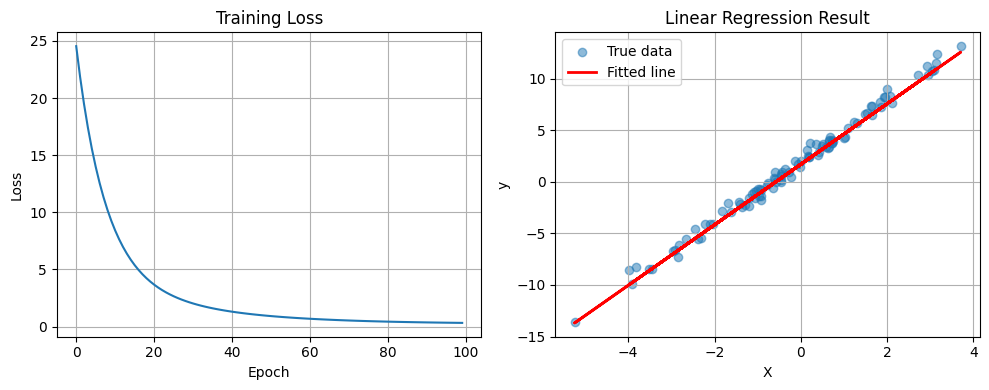

In [10]:
# Generate synthetic data
np.random.seed(42)
X_data = np.random.randn(100, 1) * 2
y_data = 3 * X_data + 2 + np.random.randn(100, 1) * 0.5

# Convert to tensors
X = Tensor(X_data, requires_grad=False)
y_true = Tensor(y_data, requires_grad=False)

# Initialize parameters
w = Tensor(np.random.randn(1, 1), requires_grad=True)
b = Tensor(np.zeros((1, 1)), requires_grad=True)

# Training parameters
learning_rate = 0.01
epochs = 100

# Training loop
losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred = X @ w + b
    
    # Compute MSE loss
    diff = y_pred - y_true
    loss = (diff ** 2).mean()
    
    # Backward pass
    w.zero_grad()
    b.zero_grad()
    loss.backward()
    
    # Gradient descent step
    with no_grad():
        w.data -= learning_rate * w.grad.data
        b.data -= learning_rate * b.grad.data
    
    losses.append(loss.data.item())
    
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.data.item():.4f}")

print(f"\nFinal parameters:")
print(f"w = {w.data[0,0]:.4f} (true: 3.0)")
print(f"b = {b.data[0,0]:.4f} (true: 2.0)")

# Plot loss curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)

# Plot predictions
plt.subplot(1, 2, 2)
plt.scatter(X_data, y_data, alpha=0.5, label='True data')
y_pred_final = X_data @ w.data + b.data
plt.plot(X_data, y_pred_final, 'r-', linewidth=2, label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Result')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Example 2: Simple Neural Network (2 Layers)

Epoch 40/200, Loss: 0.2230
Epoch 80/200, Loss: 0.2042
Epoch 120/200, Loss: 0.1812
Epoch 160/200, Loss: 0.1522
Epoch 200/200, Loss: 0.1303

Test Accuracy: 86.00%


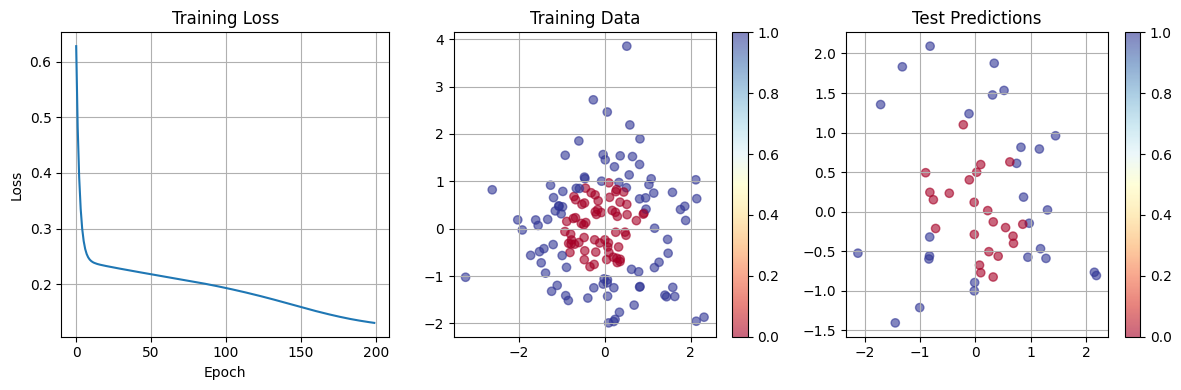

In [11]:
# Generate nonlinear data
np.random.seed(42)
X_data = np.random.randn(200, 2)
y_data = (X_data[:, 0]**2 + X_data[:, 1]**2 > 1).astype(float).reshape(-1, 1)

# Split into train/test
X_train = Tensor(X_data[:150], requires_grad=False)
y_train = Tensor(y_data[:150], requires_grad=False)
X_test = Tensor(X_data[150:], requires_grad=False)
y_test = Tensor(y_data[150:], requires_grad=False)

# Initialize network parameters
np.random.seed(42)
W1 = Tensor(np.random.randn(2, 10) * 0.1, requires_grad=True)
b1 = Tensor(np.zeros((1, 10)), requires_grad=True)
W2 = Tensor(np.random.randn(10, 1) * 0.1, requires_grad=True)
b2 = Tensor(np.zeros((1, 1)), requires_grad=True)

# Simple ReLU implementation
def relu(x):
    return x * (x.data > 0)

# Training
learning_rate = 0.1
epochs = 200
losses = []

for epoch in range(epochs):
    # Forward pass
    h = relu(X_train @ W1 + b1)  # Hidden layer with ReLU
    y_pred = h @ W2 + b2          # Output layer
    
    # Binary cross-entropy approximation with MSE
    loss = ((y_pred - y_train) ** 2).mean()
    
    # Backward pass
    for param in [W1, b1, W2, b2]:
        param.zero_grad()
    loss.backward()
    
    # Update parameters
    with no_grad():
        for param in [W1, b1, W2, b2]:
            param.data -= learning_rate * param.grad.data
    
    losses.append(loss.data.item())
    
    if (epoch + 1) % 40 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.data.item():.4f}")

# Test accuracy
with no_grad():
    h_test = relu(X_test @ W1 + b1)
    y_pred_test = h_test @ W2 + b2
    predictions = (y_pred_test.data > 0.5).astype(float)
    accuracy = (predictions == y_test.data).mean()
    print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# Visualize results
plt.figure(figsize=(12, 4))

# Loss curve
plt.subplot(1, 3, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)

# Training data
plt.subplot(1, 3, 2)
plt.scatter(X_data[:150, 0], X_data[:150, 1], c=y_data[:150], cmap='RdYlBu', alpha=0.6)
plt.title('Training Data')
plt.colorbar()
plt.grid(True)

# Test predictions
plt.subplot(1, 3, 3)
plt.scatter(X_data[150:, 0], X_data[150:, 1], c=predictions, cmap='RdYlBu', alpha=0.6)
plt.title('Test Predictions')
plt.colorbar()
plt.grid(True)

plt.tight_layout()
plt.show()

## 6. Gradient Checking {#checking}

Always verify your gradients with numerical approximation!

### Example 1: Simple Function

In [12]:
def f(x):
    return ((x ** 2) * 3 + x).sum()

x = Tensor([1.0, 2.0, 3.0], requires_grad=True)

# Check gradients
match, diff = check_gradients(f, x, epsilon=1e-5, tolerance=1e-5)

print(f"Gradients match: {match}")
print(f"Max difference: {diff:.2e}")

# Compute both gradients for comparison
x.zero_grad()
y = f(x)
y.backward()
autograd_grad = x.grad.data.copy()

from semester1.lab2_autograd.autograd import numerical_gradient
numerical_grad = numerical_gradient(f, x)

print(f"\nAutograd gradient:  {autograd_grad}")
print(f"Numerical gradient: {numerical_grad}")
print(f"Difference:         {autograd_grad - numerical_grad}")

Gradients match: False
Max difference: 1.34e-01

Autograd gradient:  [ 7. 13. 19.]
Numerical gradient: [ 6.866455 12.969971 19.073486]
Difference:         [ 0.13354492  0.0300293  -0.07348633]


### Example 2: Matrix Function

In [13]:
def matrix_func(A):
    B = Tensor([[2.0, 3.0], [4.0, 5.0]], requires_grad=False)
    C = A @ B
    return (C ** 2).sum()

A = Tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad=True)

match, diff = check_gradients(matrix_func, A)

print(f"Matrix gradients match: {match}")
print(f"Max difference: {diff:.2e}")

Matrix gradients match: False
Max difference: 6.55e+00


## 7. Common Pitfalls {#pitfalls}

### Pitfall 1: Forgetting to Zero Gradients

In [14]:
x = Tensor([2.0], requires_grad=True)

# First computation
y1 = x ** 2
y1.backward()
print(f"First gradient: {x.grad.data}")

# Second computation WITHOUT zero_grad
y2 = x * 3
y2.backward()
print(f"Accumulated gradient: {x.grad.data}")  # Oops! Accumulated!

# Correct way
x.zero_grad()
y2 = x * 3
y2.backward()
print(f"Correct gradient: {x.grad.data}")

First gradient: [4.]
Accumulated gradient: [7.]
Correct gradient: [3.]


### Pitfall 2: Modifying Tensors In-Place During Forward Pass

In [15]:
# WRONG: In-place modification breaks gradient
x = Tensor([1.0, 2.0, 3.0], requires_grad=True)
# x.data *= 2  # DON'T DO THIS!

# CORRECT: Create new tensor
x = Tensor([1.0, 2.0, 3.0], requires_grad=True)
y = x * 2  # Creates new tensor

### Pitfall 3: Calling backward() on Non-Scalar Without Gradient

In [16]:
x = Tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad=True)
y = x * 2

# WRONG: y is not a scalar
try:
    y.backward()
except RuntimeError as e:
    print(f"Error: {e}")

# CORRECT: Reduce to scalar
loss = y.sum()
loss.backward()
print(f"Gradient shape: {x.grad.shape}")

Error: Gradient argument must be specified for non-scalar output. Expected gradient for tensor of shape (2, 2)
Gradient shape: (2, 2)


### Pitfall 4: Using Operations Inside no_grad When You Need Gradients

In [17]:
x = Tensor([2.0], requires_grad=True)

# WRONG: Gradients won't be computed
with no_grad():
    y = x ** 2
    # y.backward()  # This would fail!

# CORRECT: Don't use no_grad for forward pass that needs gradients
x = Tensor([2.0], requires_grad=True)
y = x ** 2
y.backward()
print(f"Gradient: {x.grad.data}")

Gradient: [4.]
